In [1]:
using Plots
using DifferentialEquations
using ParameterizedFunctions

In [2]:
harmonic! = @ode_def HarmoniOscillator begin
    dv = -x
    dx =  v
end

(::HarmoniOscillator{var"###ParameterizedDiffEqFunction#292", var"###ParameterizedTGradFunction#293", var"###ParameterizedJacobianFunction#294", Nothing, Nothing, ODESystem}) (generic function with 1 method)

In [3]:
u0 = [1., 0.]
tspan = (0., 10.)

(0.0, 10.0)

In [4]:
prob = ODEProblem(harmonic!, u0, tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 1.0
 0.0

In [5]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 22-element Vector{Float64}:
  0.0
  0.0009990009990009992
  0.010989010989010992
  0.07985922249873038
  0.2403882280626971
  0.48125583199780264
  0.7872724750204353
  1.1770558023021032
  1.630266513673432
  2.1040018658103854
  2.6513321708517577
  3.2715754793582668
  3.8874032932563773
  4.571106719947906
  5.29407983736664
  5.997698479174782
  6.789244611030547
  7.512432119368405
  8.343050410987054
  9.085513035590031
  9.93906253932242
 10.0
u: 22-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, 0.000999000832833342]
 [0.9999396214263468, 0.010988789821184267]
 [0.9968129466114029, 0.07977436592568171]
 [0.9712456180254766, 0.23807970964822986]
 [0.8864142948207253, 0.4628927349710369]
 [0.7057801319307302, 0.7084309070362927]
 [0.3836450082688142, 0.9234805642321082]
 [-0.05943639522181022, 0.9982319800633578]
 [-0.508298

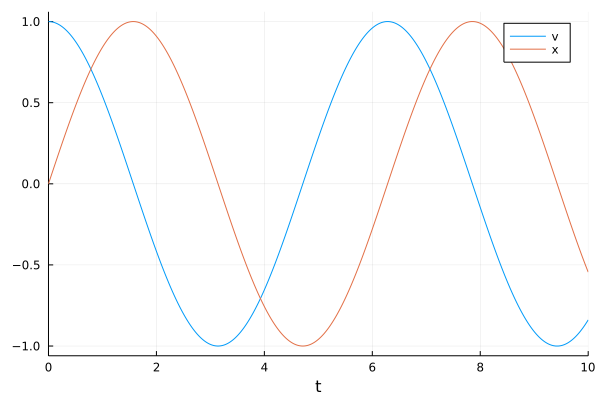

In [6]:
plot(sol)

In [7]:
function terminate_affect!(integrator)
    terminate!(integrator)
end

terminate_affect! (generic function with 1 method)

In [8]:
function terminate_condition(u, t, integrator)
    u[2]
end

terminate_condition (generic function with 1 method)

In [9]:
terminate_cb = ContinuousCallback(terminate_condition, terminate_affect!)

ContinuousCallback{typeof(terminate_condition), typeof(terminate_affect!), typeof(terminate_affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(terminate_condition, terminate_affect!, terminate_affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100)

In [10]:
sol = solve(prob, callback=terminate_cb)

retcode: Terminated
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 13-element Vector{Float64}:
 0.0
 0.0009990009990009992
 0.010989010989010992
 0.07985922249873038
 0.2403882280626971
 0.48125583199780264
 0.7872724750204353
 1.1770558023021032
 1.630266513673432
 2.1040018658103854
 2.6513321708517577
 3.1415902497670944
 3.1415902497670944
u: 13-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, 0.000999000832833342]
 [0.9999396214263468, 0.010988789821184267]
 [0.9968129466114029, 0.07977436592568171]
 [0.9712456180254766, 0.23807970964822986]
 [0.8864142948207253, 0.4628927349710369]
 [0.7057801319307302, 0.7084309070362927]
 [0.3836450082688142, 0.9234805642321082]
 [-0.05943639522181022, 0.9982319800633578]
 [-0.5082985573738591, 0.8611807771069915]
 [-0.8822130995277961, 0.470850823870733]
 [-1.000009873374677, 4.550716929519757e-16]
 [-1.000009873374677, 4.550716929519757e-16]

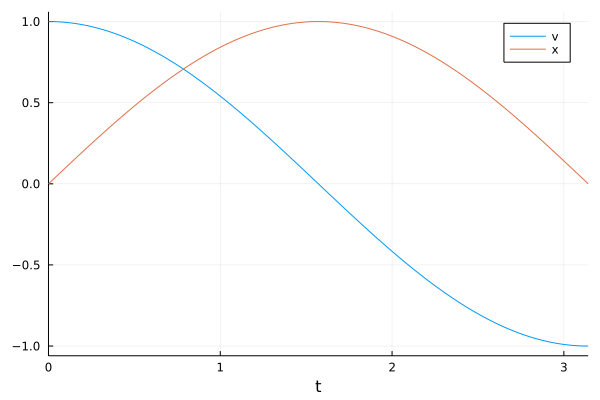

In [11]:
plot(sol)

In [12]:
sol.t[end]

3.1415902497670944

In [13]:
tspan = (0., 10000.)
prob = ODEProblem(harmonic!, u0, tspan)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 11748-element Vector{Float64}:
     0.0
     0.0009990009990009992
     0.010989010989010992
     0.07985922249873038
     0.2403882280626971
     0.48125583199780264
     0.7872724750204353
     1.1770558023021032
     1.630266513673432
     2.1040018658103854
     2.6513321708517577
     3.2715754793582668
     3.8874032932563773
     ⋮
  9991.165050910315
  9992.045212281302
  9992.88886052917
  9993.746842984634
  9994.609422480089
  9995.433673218426
  9996.315647071358
  9997.11651935653
  9998.010908116958
  9998.817987013135
  9999.711621405562
 10000.0
u: 11748-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, 0.000999000832833342]
 [0.9999396214263468, 0.010988789821184267]
 [0.9968129466114029, 0.07977436592568171]
 [0.9712456180254766, 0.23807970964822986]
 [0.8864142948207253, 0.4628927349710369]
 [0.7057801319307302, 0.

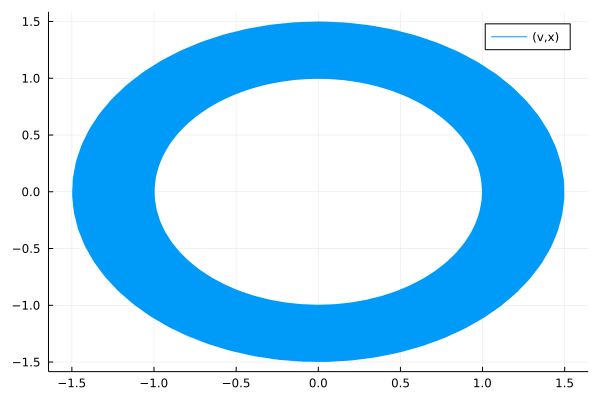

In [14]:
plot(sol, vars=(1, 2))

In [15]:
function g(resid, u, p, t)
    resid[1] = u[2]^2 + u[1]^2 - 1
    resid[2] = 0
end

g (generic function with 1 method)

In [16]:
cb = ManifoldProjection(g)
sol = solve(prob, callback=cb)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 23493-element Vector{Float64}:
     0.0
     0.0009990009990009992
     0.0009990009990009992
     0.010989010989010992
     0.010989010989010992
     0.07985922249873038
     0.07985922249873038
     0.2403882280626971
     0.2403882280626971
     0.48125583199780264
     0.48125583199780264
     0.7872724750204353
     0.7872724750204353
     ⋮
  9995.98337308831
  9995.98337308831
  9996.849518364637
  9996.849518364637
  9997.706327030439
  9997.706327030439
  9998.542004491166
  9998.542004491166
  9999.41827539426
  9999.41827539426
 10000.0
 10000.0
u: 23493-element Vector{Vector{Float64}}:
 [1.0, 0.0]
 [0.9999995009985435, 0.000999000832833342]
 [0.9999995009985435, 0.000999000832833342]
 [0.9999396214263468, 0.010988789821184267]
 [0.9999396214263468, 0.010988789821184267]
 [0.9968129466114029, 0.07977436592568171]
 [0.9968129466114029, 0.07

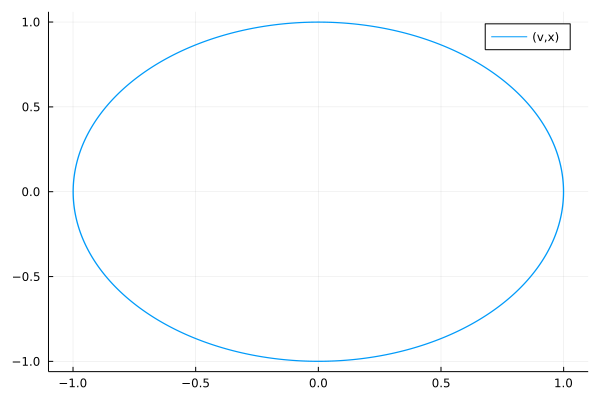

In [17]:
plot(sol, vars=(1,2))